In [2]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz

In [3]:
warnings.filterwarnings("ignore")

In [21]:
housing_boston = load_boston()
X = housing_boston.data     # data
y = housing_boston.target   # label
feature_names = housing_boston.feature_names  #feature_names

In [22]:
X = pd.DataFrame(X)

In [23]:
X.columns = feature_names

In [24]:
#划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2795)

In [25]:
# 对数据进行归一化处理
standarScaler = StandardScaler()
standarScaler.fit(X_train)
X_train_std = standarScaler.transform(X_train)
X_test_std = standarScaler.transform(X_test)

In [26]:
param_grid = {
    'random_state': [10],
    'criterion': ['mse', 'friedman_mse', 'mae'], #默认mse均方差
    'splitter': ['random', 'best'],
    'max_depth': range(1,5),
    'min_samples_leaf': range(2,30)
}

In [27]:
rt = DecisionTreeRegressor()
grid_search = GridSearchCV(rt, param_grid, cv=10)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(2, 30), 'random_state': [10],
                         'splitter': ['random', 'best']})

In [28]:
#最佳预估器
best_estimator = grid_search.best_estimator_
best_estimator

DecisionTreeRegressor(criterion='mae', max_depth=4, min_samples_leaf=5,
                      random_state=10)

In [29]:
##训练集最佳结果
best_score = grid_search.best_score_
best_score

0.7669885338788244

In [30]:
#预测分类
y_predict=grid_search.predict(X_test_std)
y_predict

array([21.1 , 24.2 , 13.8 , 24.2 , 21.1 , 24.2 , 13.8 , 13.8 , 21.1 ,
       19.45, 13.3 , 21.1 , 13.8 , 28.55, 20.8 , 28.55, 28.55, 19.4 ,
       19.4 , 21.1 , 33.25, 21.1 , 24.2 , 24.2 , 20.8 , 20.8 , 19.45,
       33.25, 21.1 , 19.45, 24.2 , 21.1 , 10.2 , 13.8 , 13.8 , 13.8 ,
       10.2 , 28.55, 13.8 , 24.2 , 28.55, 21.1 , 19.45, 20.8 , 20.8 ,
       13.8 , 19.45, 19.45, 21.1 , 10.2 , 21.1 , 13.3 , 21.1 , 33.25,
       24.2 , 19.45, 13.8 , 10.2 , 24.2 , 13.8 , 19.45, 33.25, 21.1 ,
       48.5 , 19.45, 19.45, 13.8 , 19.45, 19.4 , 19.45, 24.2 , 45.4 ,
       33.25, 19.45, 33.25, 28.55, 13.8 , 24.2 , 21.1 , 20.8 , 19.4 ,
       20.8 , 28.55, 21.1 , 33.25, 19.45, 28.55, 19.45, 20.8 , 21.1 ,
       20.8 , 28.55, 45.4 , 50.  , 21.1 , 13.8 , 21.1 , 19.45, 24.2 ,
       24.2 , 10.2 , 20.8 ])

In [31]:
#测试集准确率
score = best_estimator.score(X_test_std, y_test)
score

0.602662794496104

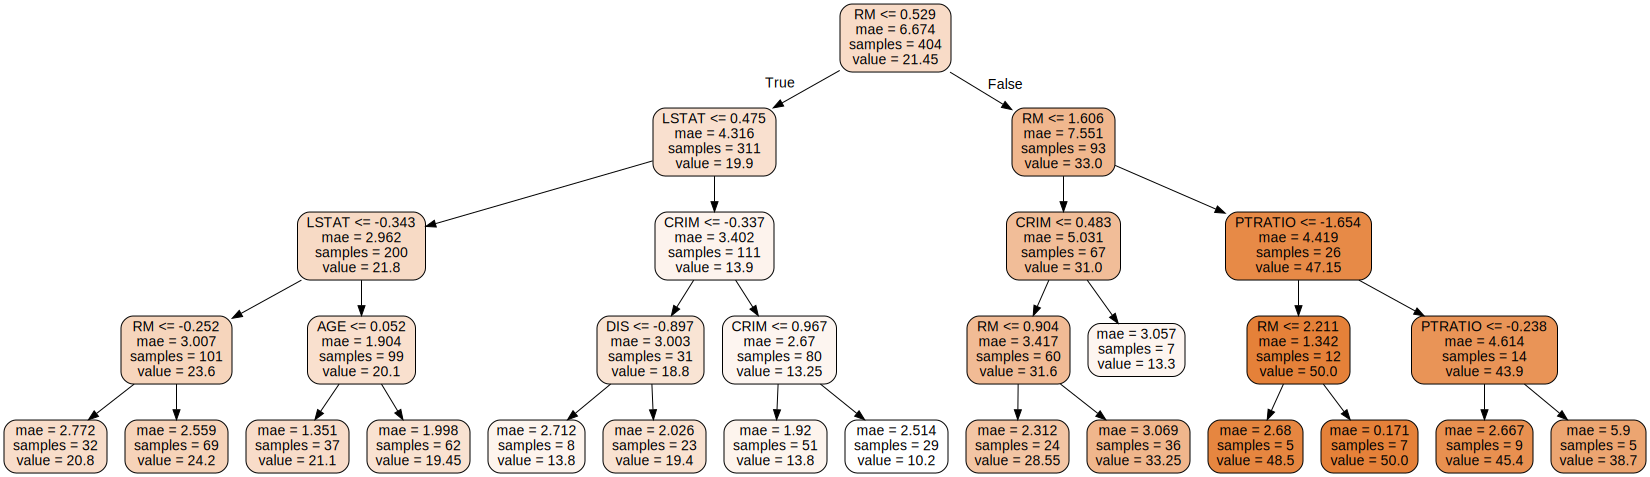

In [32]:
dot_data = export_graphviz(best_estimator
                           ,feature_names = feature_names
                           ,filled=True
                           ,rounded=True
                          )  
graph = graphviz.Source(dot_data)
graph